## ***Diabetes Prediction***


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/sample_data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


***Explore Dataset***


In [4]:
# Size of Dataset
df.shape

(2000, 9)

In [5]:
# Dataset have 2000 rows and 9 columns

In [6]:
# Columns of dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Datatypes of each columns
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [8]:
# First 5 rows of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
# Value counts of Outcome column
df['Outcome'].value_counts()

# Non Diabetic >> 0
# Diabetic >> 1

,count
Outcome,
0,1316
1,684


In [10]:
# Information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [11]:
# Statistical Information about numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [12]:
# Finding null values in dataset
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## **Exploratory Data Analysis (EDA)**


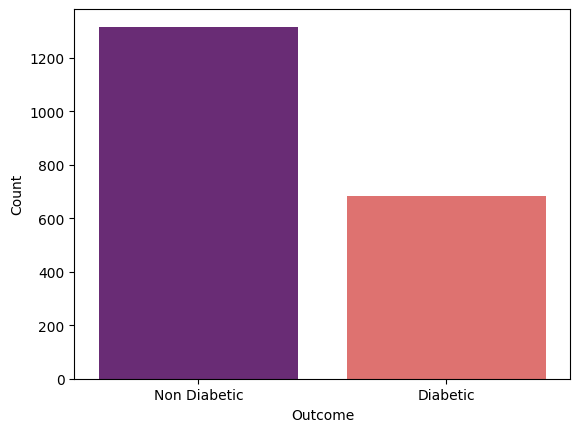

In [13]:
# Plotting the Outcome columns on basis of dataset
sns.countplot(x = df['Outcome'], palette ='magma')
plt.xticks([0,1],['Non Diabetic','Diabetic'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

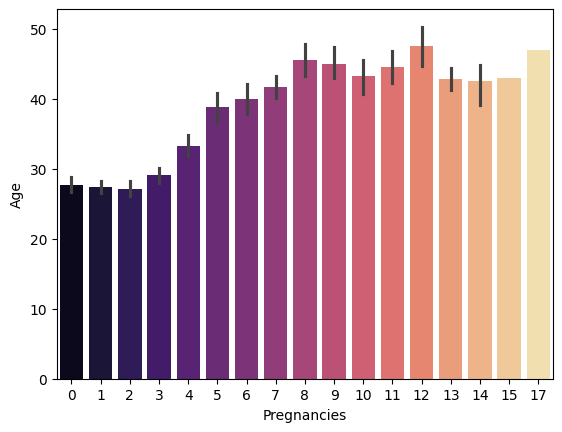

In [14]:
sns.barplot(y = df['Age'],x = df['Pregnancies'], palette = 'magma')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()

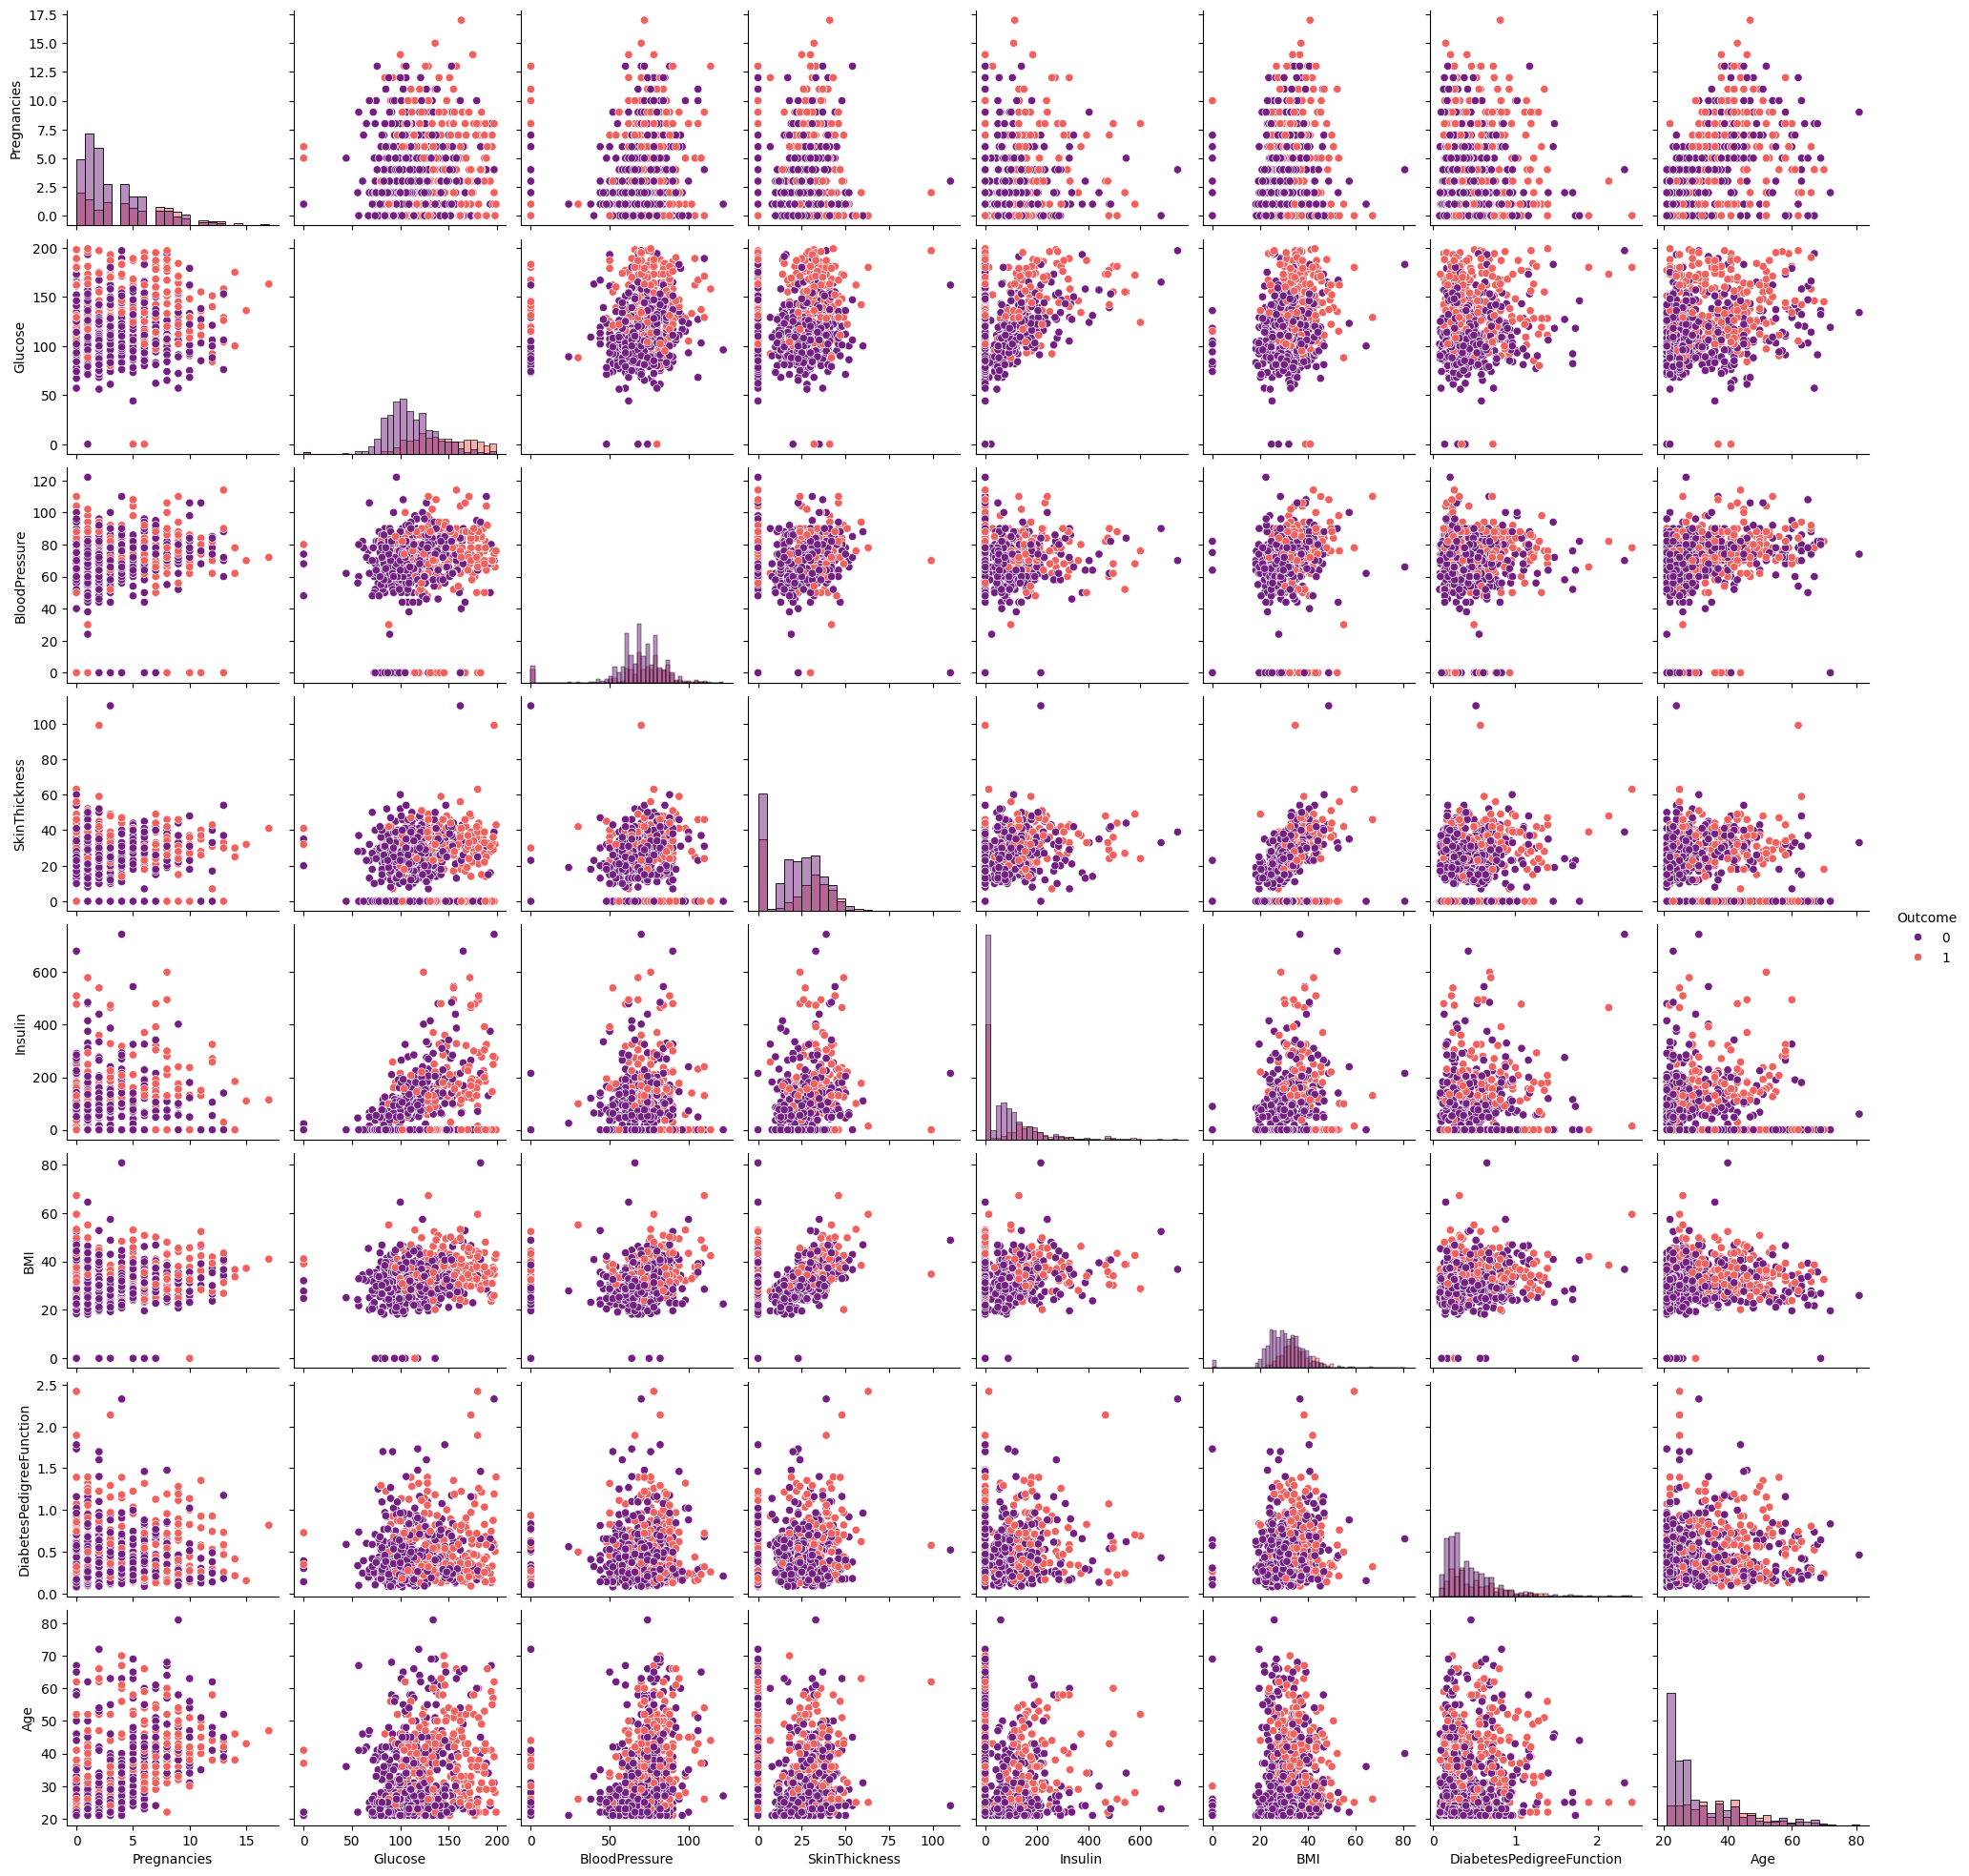

In [15]:
sns.pairplot(df,hue = 'Outcome',palette='magma',diag_kind='hist')
plt.show()

In [16]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


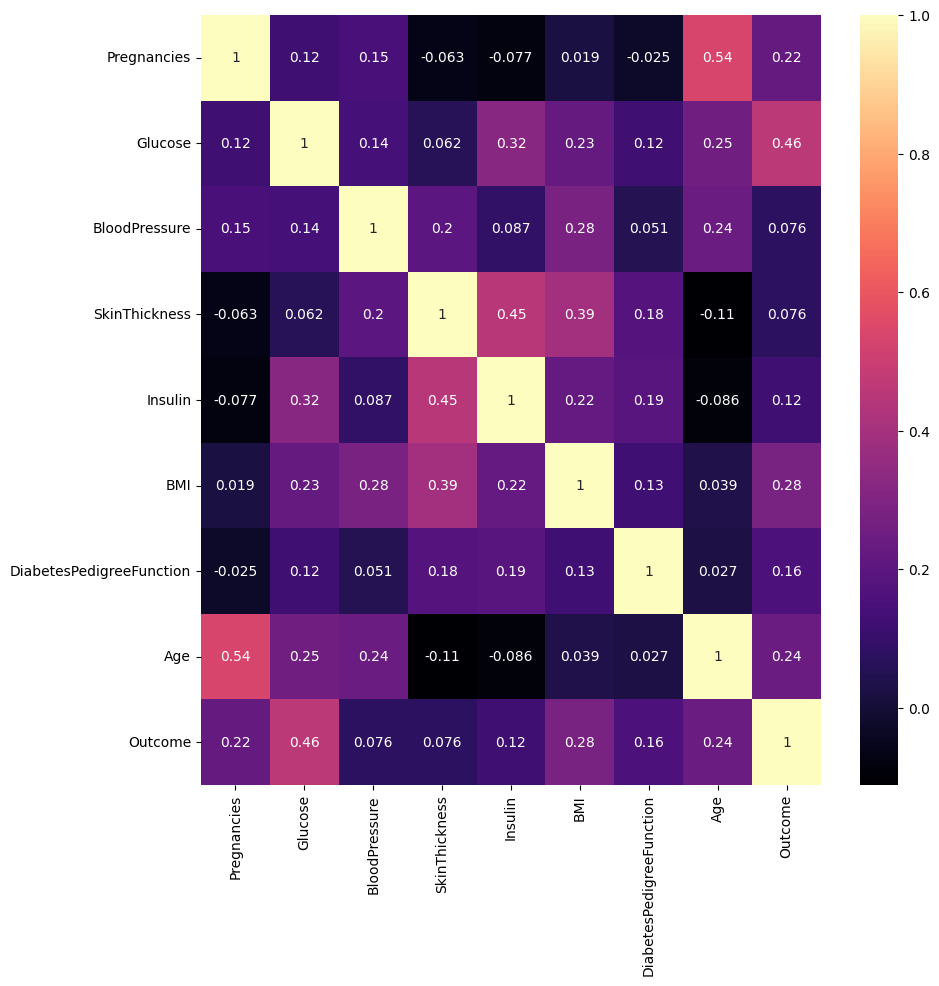

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True, cmap = 'magma')
plt.show()

# ***Data Cleaning***

In [18]:
# Make a copy of DataFrame

df_copy = df.copy()

In [19]:
# Replacing 0 values by null values in columns ['Glucose','BMI','BloodPressure','SkinThickness','Insulin']

df_copy[['Glucose','BMI','BloodPressure','SkinThickness','Insulin']] = df_copy[['Glucose','BMI','BloodPressure','SkinThickness','Insulin']].replace(0,np.nan)
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,13
BloodPressure,90
SkinThickness,573
Insulin,956
BMI,28
DiabetesPedigreeFunction,0
Age,0
Outcome,0


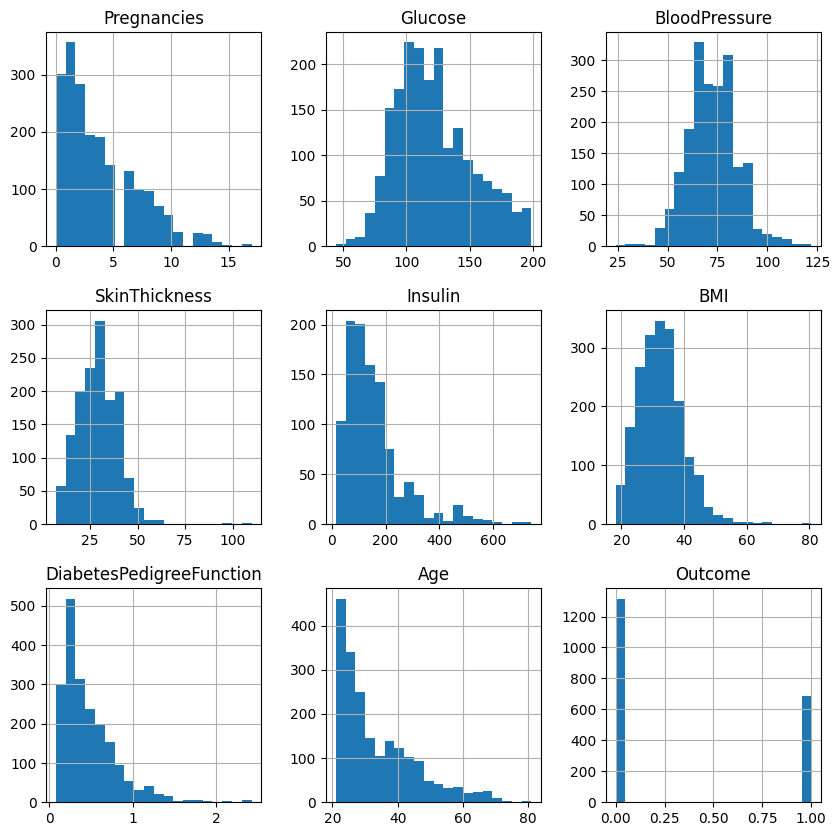

In [20]:
# Hist plot before missing value treatment
df_copy.hist(figsize = (10,10),bins = 20,)
plt.show()

<Axes: >

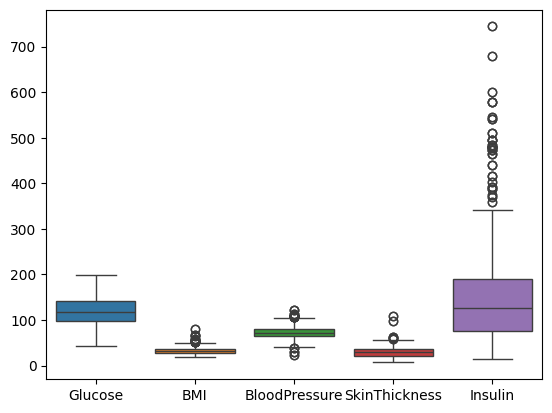

In [21]:
# Missing Value Treatment

sns.boxplot(df_copy[['Glucose','BMI','BloodPressure','SkinThickness','Insulin']])

In [22]:
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())

In [23]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


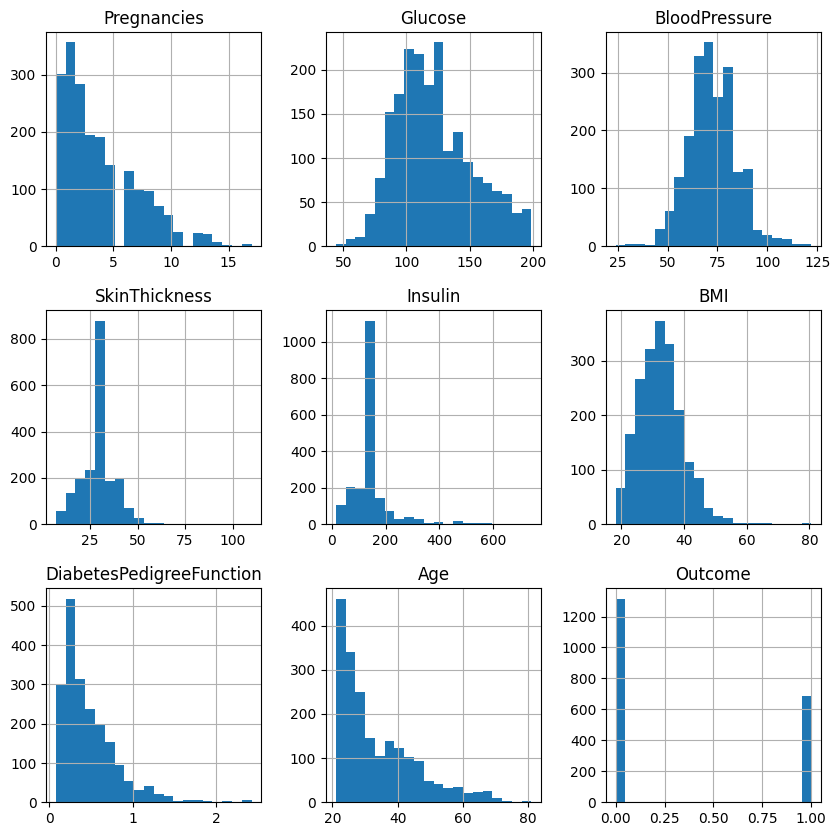

In [24]:
# Hist plot after missing value treatment
df_copy.hist(figsize = (10,10),bins = 20)
plt.show()

# ***Model Building***

In [25]:
# Separate x and y
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [26]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

print(f"x_train size : {x_train.shape}, x_test size : {x_test.shape}")
print(f"y_train size : {y_train.shape}, y_test size : {y_test.shape}")

x_train size : (1600, 8), x_test size : (400, 8)
y_train size : (1600,), y_test size : (400,)


In [27]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
'''
 I will experiment 5 different algorithms on this dataset

 1. Logistic Regression
 2. Decision Tree Classifier
 3. Random Forest Classifier
 4. Support Vector Classifier
 5. AdaBoost Classifier
'''

'\n I will experiment 5 different algorithms on this dataset\n\n 1. Logistic Regression\n 2. Decision Tree Classifier\n 3. Random Forest Classifier\n 4. Support Vector Classifier\n 5. AdaBoost Classifier\n'

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [30]:
# Define a function to find best fit model

from sklearn.model_selection import GridSearchCV

def best_model(x,y):
  models = {
      'Logistic Regression': {
          'model': LogisticRegression(),
          'parameters':{'C':[1,2,3,5,10],'penalty':['l1','l2','elasticnet']}
      },
      'Decision Tree Classifier':{
          'model': DecisionTreeClassifier(),
          'parameters':{'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[5,10]}
      },
      'Random Forest Classifier':{
          'model': RandomForestClassifier(),
          'parameters':{'criterion':['gini','entropy'],'n_estimators':[1,2,10,50,100],'max_depth':[5,10]}
      },
      'Support Vector Classifier':{
          'model': SVC(),
          'parameters':{'C':[1,2,3,5,10],'kernel':['linear','rbf','poly'],'gamma':['scale','auto']}
      },
      'AdaBoost Classifier':{
          'model':AdaBoostClassifier(),
          'parameters':{'n_estimators':[1,2,10,50,100],'learning_rate':[1,2,5,10]}
      }

  }

  scores=[]
  for mod_name,mod_params in models.items():
    classifier = GridSearchCV(estimator = mod_params['model'],param_grid = mod_params['parameters'],cv = 5)
    classifier.fit(x,y)
    scores.append({
        'model':mod_name,
        'Best Parameters':classifier.best_params_,
        'Best Score':classifier.best_score_
    })

  return pd.DataFrame(scores,columns = ['model','Best Parameters','Best Score'])


In [31]:
best_model_df = best_model(x_train,y_train)

In [46]:
pd.set_option('display.max_colwidth', 100)
best_model_df

,model,Best Parameters,Best Score
0,Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.773125
1,Decision Tree Classifier,"{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}",0.905625
2,Random Forest Classifier,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}",0.948125
3,Support Vector Classifier,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.863125
4,AdaBoost Classifier,"{'learning_rate': 1, 'n_estimators': 100}",0.782500


Since the Random Forest Classifier has highest accuracy, we use this classifier for prediction.

In [37]:
# Create model for Random Forest Classifier
final_model = RandomForestClassifier(n_estimators = 100,criterion = 'gini',max_depth = 10)
final_model

RandomForestClassifier(max_depth=10)

In [38]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = final_model,n_features_to_select=4)

In [39]:
rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=10), n_features_to_select=4)

In [40]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True])

In [41]:
rfe.ranking_

array([4, 1, 3, 5, 2, 1, 1, 1])

In [42]:
x_train = rfe.fit_transform(x_train,y_train)
x_test = rfe.transform(x_test)

In [48]:
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

# ***Model Evaluation***

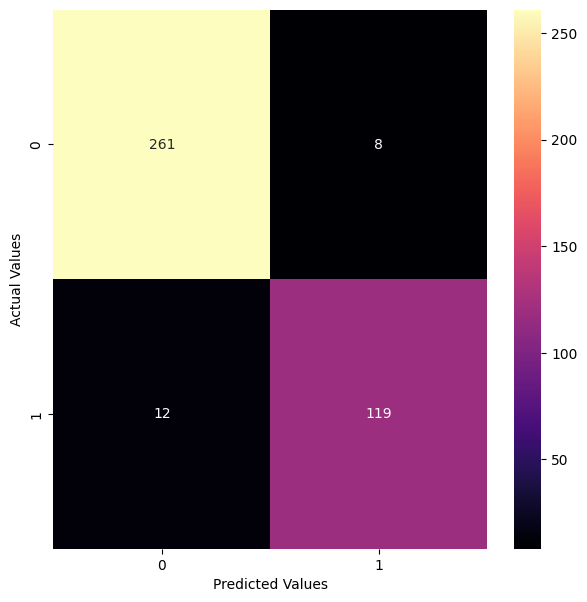

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = final_model.predict(x_test)
plt.figure(figsize = (7,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd',cmap = 'magma')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [50]:
# Accuarcy Score
print(f"Accuracy score on Test Data : {round(accuracy_score(y_test,y_pred),4)*100} %")

Accuracy score on Test Data : 95.0 %


In [51]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       269
           1       0.94      0.91      0.92       131

    accuracy                           0.95       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.95      0.95       400



In [53]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(final_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.94375  0.890625 0.934375 0.93125  0.95625 ]
Average cross-validation score: 0.93125


In [56]:
def prediction_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  input_data = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age])
  input_data = input_data.reshape(1, -1)
  scaled_data = scaler.transform(input_data)
  x_transform = rfe.transform(scaled_data)
  prediction = final_model.predict(x_transform)

  if prediction[0] == 0:
    print("Congrats!, You are not Diabetic")
  else:
    print("Sorry!, You are Diabetic")

In [64]:
y_pred_train=final_model.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1047
           1       0.99      0.99      0.99       553

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



## ***Prediction 1***

In [57]:
prediction_diabetes(4,76,62,0,0,34,0.391,25)

Congrats!, You are not Diabetic


# ***Prediction 2***

In [58]:
prediction_diabetes(6,134,70,23,130,35.4,0.542,29)

Sorry!, You are Diabetic


# ***Prediction 3***

In [59]:
prediction_diabetes(2,87,0,23,0,28.9,0.773,25)

Congrats!, You are not Diabetic


# ***Prediction 4***

In [60]:
prediction_diabetes(0,84,82,31,125,38.2,0.233,23)

Congrats!, You are not Diabetic


# ***Prediction 5***

In [63]:
prediction_diabetes(4,173,70,14,168,29.7,0.361,33)

Sorry!, You are Diabetic


In [66]:
import pickle
pickle.dump(final_model,open('final_diabetes_model.pkl','wb'))